In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn nltk torch tqdm


In [ ]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train



,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
print(train['target'].value_counts())

target
0    4342
1    3271
Name: count, dtype: int64


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

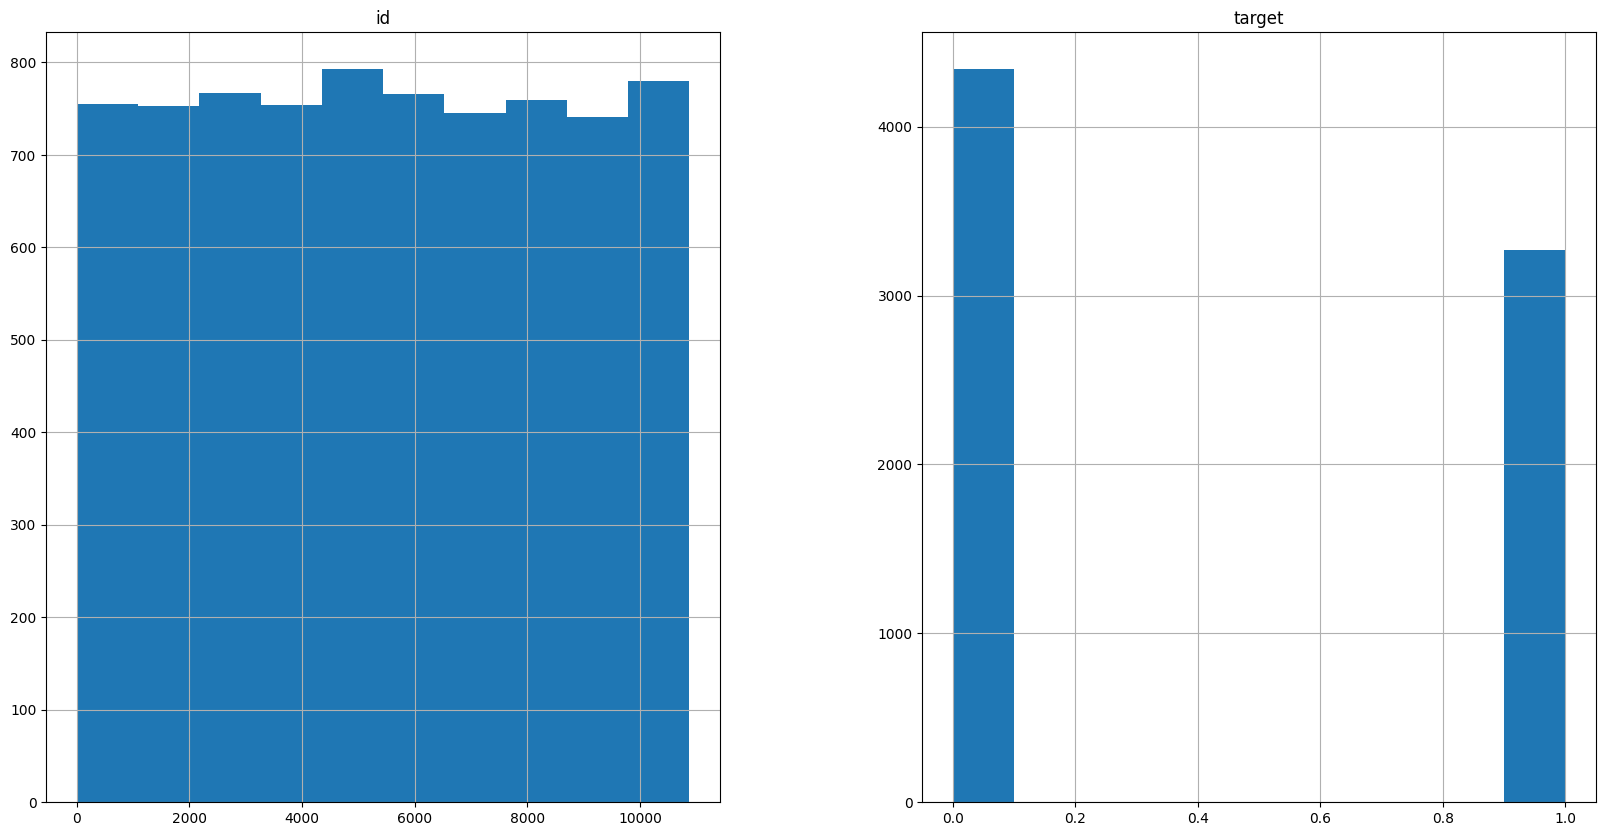

In [ ]:
train.hist(figsize=(20,10))

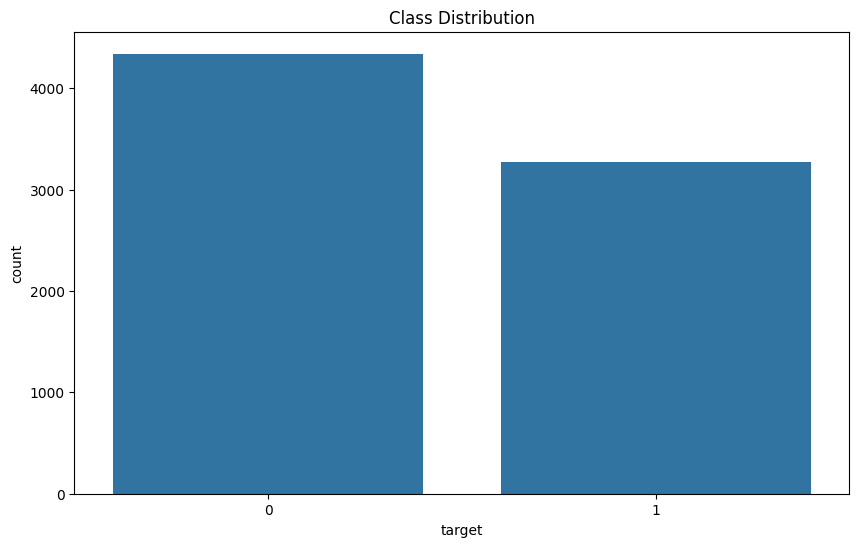

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x=train['target'])
plt.title("Class Distribution")
plt.show()


In [ ]:
for _ in range(5):
    print(train.sample(1)['text'].values[0])
# to print samples with noise

Photo: postapocalypticflimflam: Prodding around the rubble. http://t.co/Bgy4i47j70
Hellfire is surrounded by desires so be careful and donÛªt let your desires control you! #Afterlife #islam
Man crush everyday ????  @CristianInspire http://t.co/iXjQG1sx6u
@MithiTennis @CrackedGem Which is why I want her to be better - which means death awaits her. Most of us aren't heroes we are survivors
Rly tragedy in MP: Some live to recount horror: ÛÏWhen I saw coaches of my train plunging into water I called ... http://t.co/vScPGMsJXY


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

trusted_sources = {"cnn", "bbc", "reuters", "ap"}
NEGATIONS = {"no", "not", "never"}


def replace_mentions(text):
    def helper(match):
        user = match.group()[1:].lower()
        return "<NEWS>" if user in trusted_sources else "<USER>"
    return re.sub(r"@\w+", helper, text)

def clean_text(text):
    text = text.lower()
    text = replace_mentions(text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^\w\s'<]", "", text)

    tokens = text.split()
    tokens = [
        t for t in tokens
        if (t not in stop_words) or (t in NEGATIONS)
    ]
    return " ".join(tokens)


train['clean'] = train['text'].apply(clean_text)
test['clean'] = test['text'].apply(clean_text)


In [ ]:
train[['text', 'clean']].head(10)


,text,clean
0,Our Deeds are the Reason of this #earthquake M...,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,residents asked 'shelter place' notified offic...
3,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfires pou...
5,#RockyFire Update => California Hwy. 20 closed...,rockyfire update california hwy 20 closed dire...
6,#flood #disaster Heavy rain causes flash flood...,flood disaster heavy rain causes flash floodin...
7,I'm on top of the hill and I can see a fire in...,top hill see fire woods
8,There's an emergency evacuation happening now ...,there's emergency evacuation happening buildin...
9,I'm afraid that the tornado is coming to our a...,afraid tornado coming area


In [ ]:
train['clean']


,clean
0,deeds reason earthquake may allah forgive us
1,forest fire near la ronge sask canada
2,residents asked 'shelter place' notified offic...
3,13000 people receive wildfires evacuation orde...
4,got sent photo ruby alaska smoke wildfires pou...
...,...
7608,two giant cranes holding bridge collapse nearb...
7609,<USER <USER control wild fires california even...
7610,m194 0104 utc5km volcano hawaii
7611,police investigating ebike collided car little...


In [ ]:
test['clean']

,clean
0,happened terrible car crash
1,heard earthquake different cities stay safe ev...
2,forest fire spot pond geese fleeing across str...
3,apocalypse lighting spokane wildfires
4,typhoon soudelor kills 28 china taiwan
...,...
3258,earthquake safety los angeles ûò safety fasten...
3259,storm ri worse last hurricane cityamp3others h...
3260,green line derailment chicago
3261,meg issues hazardous weather outlook hwo


In [ ]:
X = train["clean"]
y = train["target"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer( max_features=5000, ngram_range=(1, 2) )

X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report, f1_score

y_pred_nb = nb_model.predict(X_val_tfidf)

print("Naive Bayes Results")
print(classification_report(y_val, y_pred_nb, target_names=["Not Disaster", "Disaster"]))
print("F1-score:", f1_score(y_val, y_pred_nb))


Naive Bayes Results
              precision    recall  f1-score   support

Not Disaster       0.77      0.91      0.84       874
    Disaster       0.84      0.64      0.73       649

    accuracy                           0.79      1523
   macro avg       0.81      0.78      0.78      1523
weighted avg       0.80      0.79      0.79      1523

F1-score: 0.7275892080069626


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred_lr = lr_model.predict(X_val_tfidf)

print("Logistic Regression Results")
print(classification_report(y_val, y_pred_lr, target_names=["Not Disaster", "Disaster"]))
print("F1-score:", f1_score(y_val, y_pred_lr))


Logistic Regression Results
              precision    recall  f1-score   support

Not Disaster       0.79      0.88      0.84       874
    Disaster       0.81      0.69      0.75       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523

F1-score: 0.7462437395659433


In [ ]:
nb_f1 = f1_score(y_val, y_pred_nb)
lr_f1 = f1_score(y_val, y_pred_lr)

print("Final F1-score Comparison")
print("Naive Bayes:", nb_f1)
print("Logistic Regression:", lr_f1)


Final F1-score Comparison
Naive Bayes: 0.7275892080069626
Logistic Regression: 0.7462437395659433


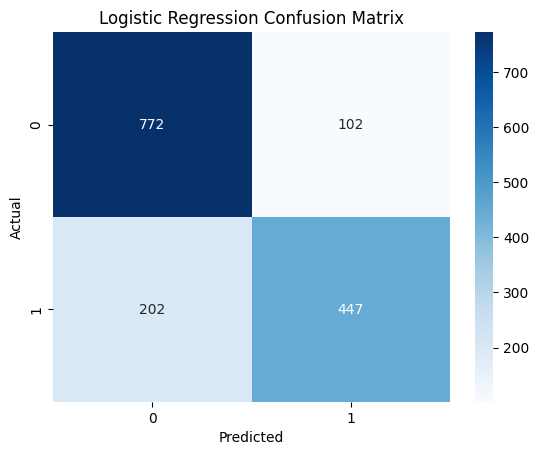

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred_lr)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


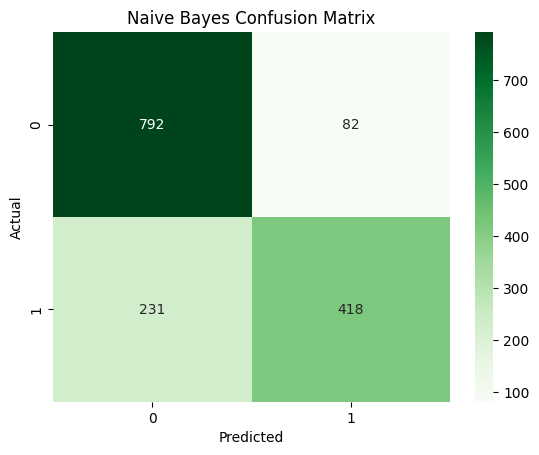

In [ ]:
cm_nb = confusion_matrix(y_val, y_pred_nb)

sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")

plt.show()


In [33]:
X_test_final = test["clean"]
X_test_tfidf = tfidf.transform(X_test_final)
test_predictions = lr_model.predict(X_test_tfidf)

submission = pd.DataFrame({
    "id": test["id"],
    "target": test_predictions
})
submission.to_csv("submission_classic_lr.csv", index=False)


In [34]:
test_predictions_nb = nb_model.predict(X_test_tfidf)

submission_nb = pd.DataFrame({
    "id": test["id"],
    "target": test_predictions_nb
})
submission_nb.to_csv("submission_classic_nb.csv", index=False)

In [35]:
print("Logistic Regression submission results: 0.79344")
print("Naive Bayes submission results: 0.79068")


Logistic Regression submission results: 0.79344
Naive Bayes submission results: 0.79068
